<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_STEM_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools nglview

     |████████████████████████████████| 947 kB 3.9 MB/s 
     |████████████████████████████████| 5.7 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 292 kB 46.7 MB/s 
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057549 sha256=fe3ef87f1b3fce8f58a81cb449f869d2ae8bd249c1a6b0b442caa8aa4464e0ff
  Stored in directory: /root/.cache/pip/wheels/01/0c/49/c6f79d8edba8fe89752bf20de2d99040bfa57db0548975c5d5
Successfully built nglview


In [2]:
from jarvis.core.atoms import crop_square
import matplotlib.pyplot as plt
import os, glob
from jarvis.analysis.stem.convolution_apprx import STEMConv
from jarvis.db.figshare import data, get_jid_data
import matplotlib.pyplot as plt
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.lattice import get_2d_lattice
from sklearn.model_selection import train_test_split
from collections import defaultdict
%matplotlib inline
#plt.switch_backend("agg")


dft_2d = data("dft_2d")
jid = 'JVASP-667'
for i in dft_2d:
  if i['jid']==jid:
    a = Atoms.from_dict(i["atoms"])
    jid = i["jid"]
    dims = get_supercell_dims(atoms=a, enforce_c_size=50)
    s = a.make_supercell_matrix(dims)
    c = crop_square(s, csize=20)
    p = STEMConv(atoms=c, output_size=[200, 200]).simulate_surface()
    plt.imshow(p[50:150, 50:150], interpolation="gaussian", cmap="gray")
    plt.tight_layout()
    plt.axis("off")
    filename = jid + ".jpg"
    plt.savefig(filename)
    plt.close()
    break


Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 8.20M/8.20M [00:02<00:00, 3.21MiB/s]


Loading the zipfile...
Loading completed.


In [3]:
!ls

JVASP-667.jpg  sample_data


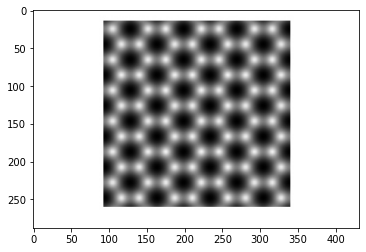

In [4]:
plt.imshow(plt.imread('JVASP-667.jpg'))

In [6]:
import plotly.express as px
import numpy as np
img=plt.imread('JVASP-667.jpg')
fig = px.imshow(img)
fig.show()